## DSCI100 Individual Planning Project
Samantha Kwong

In [1]:
library(tidyverse)
library(dplyr)
set.seed(123)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Section 1: Data Description

In [2]:
players_url <- read_csv("https://raw.githubusercontent.com/skwong06/dsci_project_individual/refs/heads/main/players.csv")
head(players_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


The players.csv dataset includes 7 columns (variables) and 196 rows (observations). 
1. **experience:**
Shows player skill level. Includes: Beginner, Amateur, Regular, Pro and Veteran.
2. **subscribe:**
Indicates whether the player is subscribed to receive the newsletter
3. **hashedEmail:**
Shows the user’s email in an encrypted code
4. **played_hours:**
Records how long each player played the game in hours
5. **name:**
Tells the reader the name of the individual player
6. **gender:** 
Describes to the reader if the player is either male or female
7. **Age:** 
Tells the reader the age of the player that is playing the game


In [3]:
sessions_url <- read_csv("https://raw.githubusercontent.com/skwong06/dsci_project_individual/refs/heads/main/sessions.csv")
head(sessions_url)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


The sessions.csv has 5 columns (variables) and 1535 rows (observations). 
1. **hashedEmail:**
Shows the user’s email in an encrypted code
2. **Start_time:**
Shows the time the player started their play session, using the date played and timestamp
3. **End_time:** 
Shows the time the player ended their play session, using the date played and timestamp
4. **Original_start_time:**
Shows the time the player started their session in UNIX time (milliseconds)
5. **Original_end_time:**
Shows the time the player ended their session in UNIX time (milliseconds)


## Section 2: Questions

Using the board question “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?,” my formulated question is “Can the levels of experience of the player and the hours played predict players subscription to the game using the players.csv dataset ?” I will use the players.csv dataset to help me address the question as it contains the variables of experience and hours_played for each player. These variables will be used to determine their influence on user subscription. A thing to keep in mind is the experience variable is a categorical variable, meaning converting it to a numeric variable would be necessary before plotting. 

## Section 3: Exploratory Data Analysis and Visualization

In [4]:
players_data <- players_url |>
mutate(experience_level = as.numeric(factor(experience, 
levels = c("Beginner", "Amateur", "Pro", "Regular", "Veteran"))))
head(players_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,experience_level
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,3
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,5
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,2
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,4
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,2


Here, we mutated the dataset to create a new column that shows the experience level in a numeric scale ranging from 1-5.

In [5]:
players_select <- players_data |>
select(subscribe, experience_level, played_hours)
head(players_select)

subscribe,experience_level,played_hours
<lgl>,<dbl>,<dbl>
TRUE,3,30.3
TRUE,5,3.8
FALSE,5,0.0
TRUE,2,0.7
TRUE,4,0.1
TRUE,2,0.0


Here, we selected the predictor (subscribe) and explanatory (experience_level, played_hours) variables to ensure our data can be read more easily. The variables selected were subscribe, experience_level, and played_hours. This allows us to work with the variables we need.

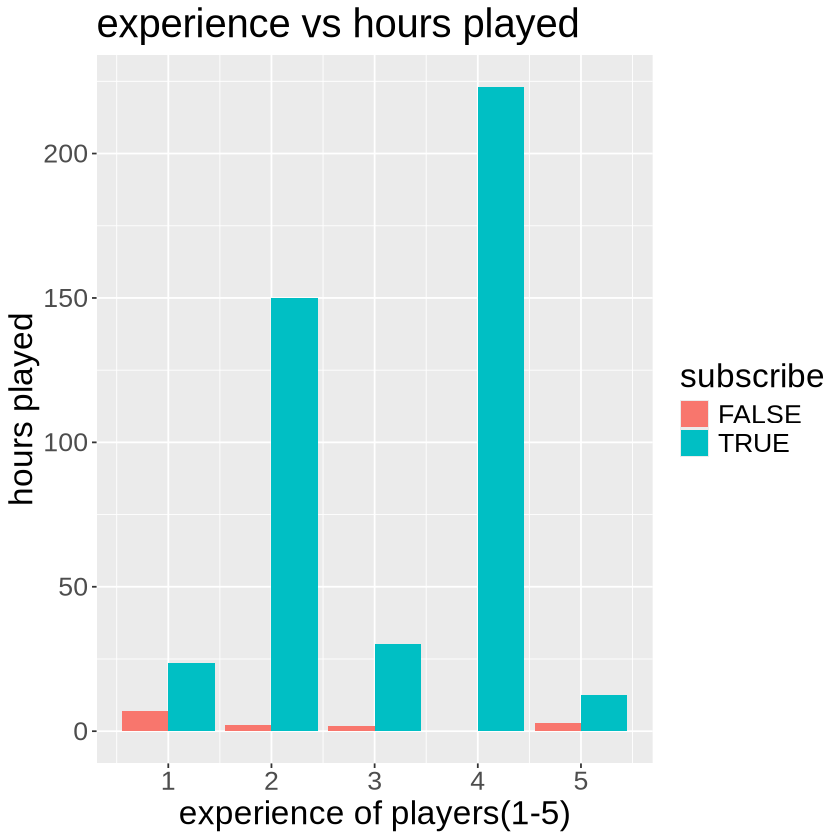

In [6]:
subscribe_plot_bar <- players_select |>
ggplot(aes(x=experience_level, y=played_hours, fill=subscribe)) +
geom_bar(stat="identity", position = "dodge") +
xlab("experience of players(1-5)") +
ylab("hours played") +
ggtitle("experience vs hours played") +
theme(text = element_text(size=20)) 

subscribe_plot_bar

Through this bar plot it appears players that play the game for longer hours seem to subscribe more to the newsletter. However, the data is not scaled, therefore an accurate representation of the proportions of user subscribed and not subscribed is hard to interpret. There seems to be no trend for experience level.

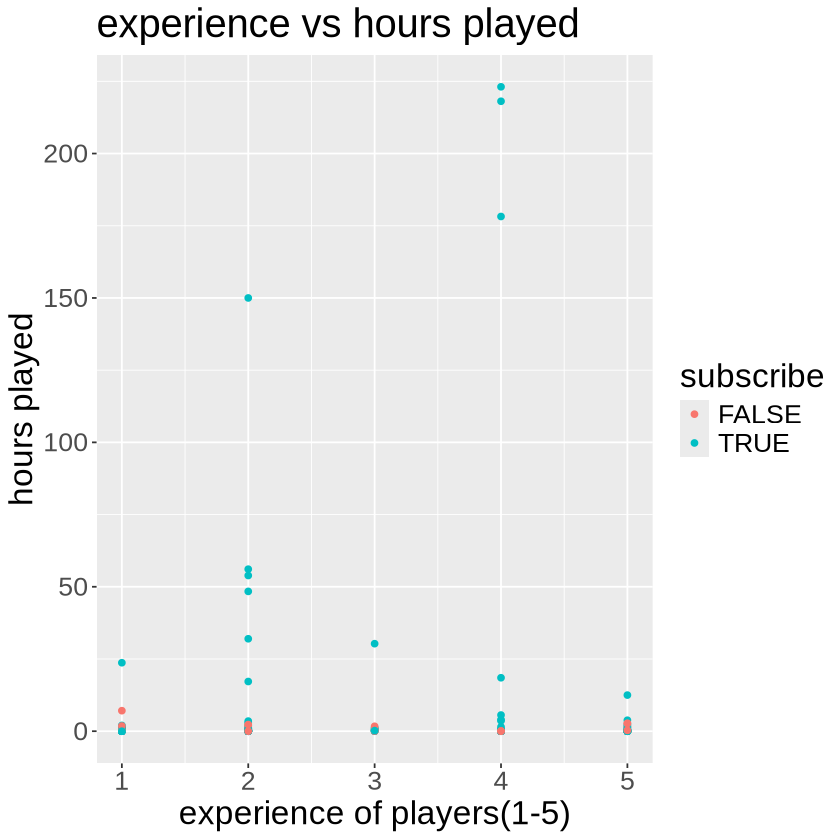

In [7]:
subscribe_plot_point <- players_select |>
ggplot(aes(x=experience_level, y=played_hours, color=subscribe)) +
geom_point() +
xlab("experience of players(1-5)") +
ylab("hours played") +
ggtitle("experience vs hours played") +
theme(text = element_text(size=20)) 

subscribe_plot_point

Through this scatter plot it shows the relationship between players experience level and hours played. However, compared to the bar plot, this one is more dificult to read as the visualization is quite small. There is also much overlap on the points which could casue inaccurate readings. 

In [8]:
players_mean <- players_data |>
summarize(
    mean_experience_level = mean(experience_level, na.rm=TRUE),
    mean_played_hours = mean(played_hours, na.rm=TRUE),
    mean_subscribe = mean(subscribe, na.rm=TRUE)
    )
players_mean

mean_experience_level,mean_played_hours,mean_subscribe
<dbl>,<dbl>,<dbl>
2.994898,5.845918,0.7346939


#### Mean Values Quantitative Variables
|experience level mean | played hours mean | subscribe mean |
|----------------------|-------------------|----------------|
| 2.994898             | 5.845918          | 0.7346939      |

## Section 4: Methods and Plans

The method that can be used to address my question “Can the levels of experience of the player and the hours played predict players subscription to the game using the players.csv dataset?” is to use binary classification. The method regression will not be used as the values it requires need to be numerical, not categorical. I will compare and select the model using the KNN algorithm. This model is appropriate because the variable we are trying to predict has two possible outcomes which are subscribed or not subscribed. Using binary classification allows us to measure the independent variables (experience level and hours played) and their influence on a player subscribing. Using the KNN algorithm is also appropriate as it is flexible and the dataset we are using is not exceedingly large. Assumptions required for this method is that the data points are close together before prediction can occur. This means the dataset must be scaled and standardized before testing. Potential weaknesses of this method and algorithm is that the larger the training data becomes, the algorithm becomes slower. Additionally, large amounts of predictors are not ideal and it can be sensitive to irrelevant pieces of data and noise. Before applying the data to the model, we need to preprocess the data. This can be done by scaling the dataset and removing any values that are empty. Afterwards, we can split the data into training and testing sets, possibly a 70% and 30% split to ensure enough data can be trained and tested to avoid over and under fitting. A 5 cross validation can also be carried out to increase the accuracy of the dataset and prediction.
